In [1]:
import os

from pyspectrum import Spectrometer, Spectrum, UsbID
from spectrumlab.alias import TemperatureUnits

from core.calibration import Calibration
from core.model import Model

import warnings
warnings.filterwarnings('ignore')

## Чтение данных с файла

In [21]:
# load data from file
template = os.path.join('.', 'data', 'полки и наростание', '{}', '{}', 'data')

# load calibration
calibration = Calibration(
    spectrum=Spectrum.load(path=template.format('лампа', '(2)')),
    T=2800,
)

# load spectrum
spectrum = Spectrum.load(path=template.format('2400С 3000 шим', '(1)'))

## Чтение данных с устройства

### Инициализация и настройка устройства

In [2]:
# setup device
device = Spectrometer(UsbID())
device.set_config(
    exposure=2,
    n_times=10000,
    wavelength_calibration_path='data/profile.json',
)
device.read_dark_signal(n_times=1000)

Wavelength calibration loaded


### Калибровка устройства

In [3]:
# load calibration
calibration = Calibration.load(
    path=os.path.join('.', 'data', 'lamp'),
    T=2800,
)

# # read calibration
# spectrum = device.read()
# spectrum.save('data/lamp')

# calibration = Calibration(
#     spectrum=spectrum,
#     T=2800,
# )

### Чтение данных с устройства

In [4]:
# # load spectrum
# spectrum = Spectrum.load(
#     path='data/spe',
# )

# read spectrum from device
spectrum = device.read()
spectrum.save('data/spe')

## Расчет температуры

In [22]:
model = Model(units=TemperatureUnits.celsius)
model = model.fit(
    calibration=calibration,
    wavelength_range=(630, 820),  # in nm
)

In [23]:
temperature = model.predict(
    spectrum=spectrum,
)

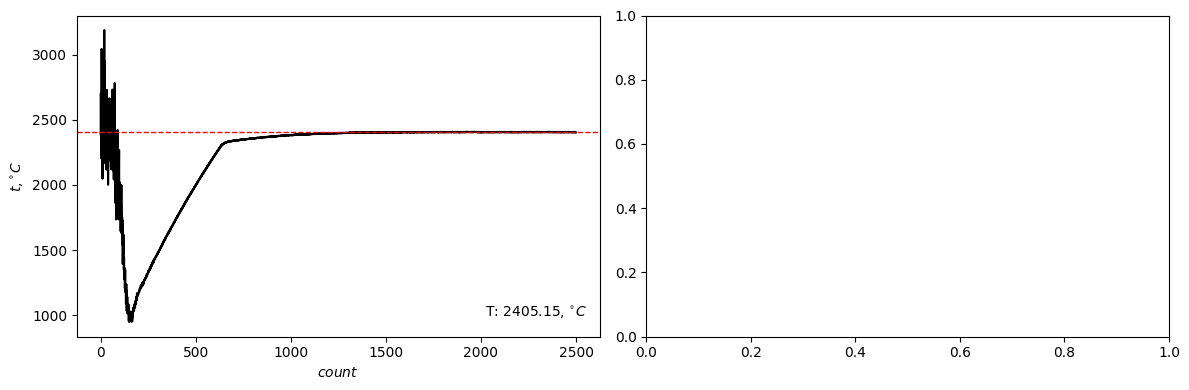

In [24]:
temperature.show(
    # xlim=(1250, 1550),
    # ylim=(2500, 2650),
)

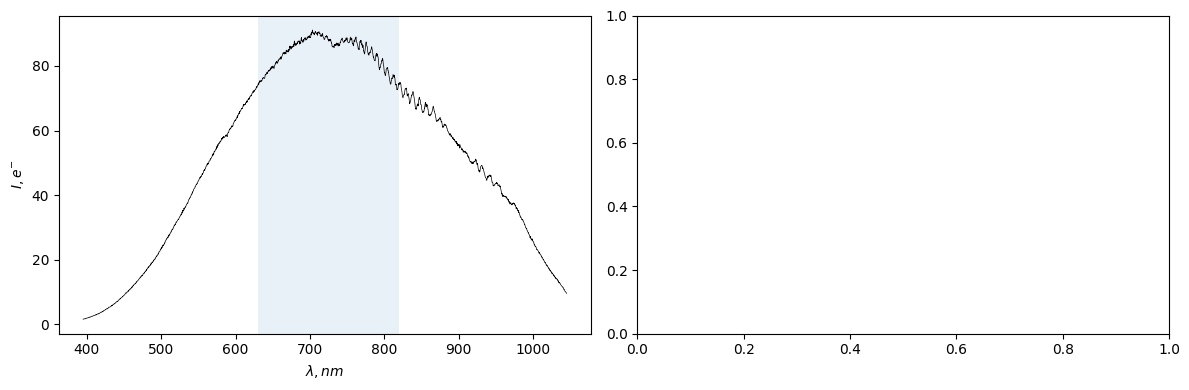

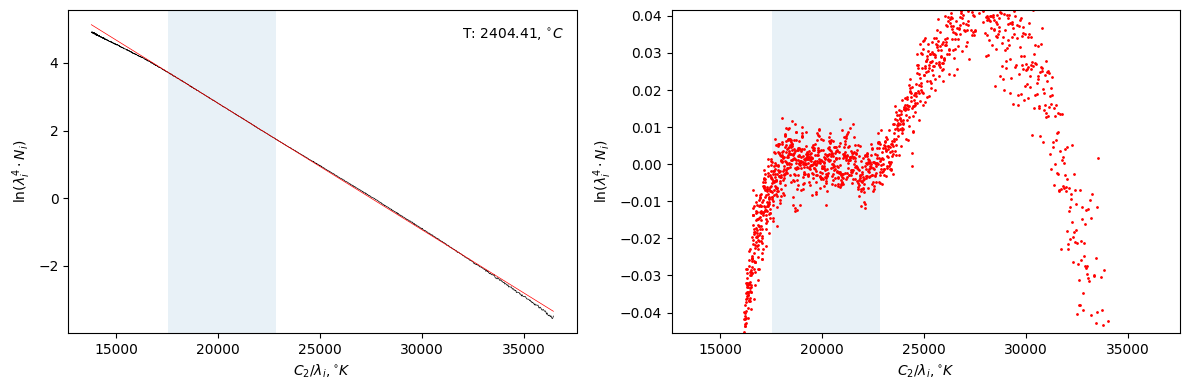

In [25]:
temperature.show_frame(t=-10)